# Batch correction in Bulk RNA-seq or microarray data

Variability in datasets are not only the product of biological processes: they are also the product of technical biases (Lander et al, 1999). ComBat is one of the most widely used tool for correcting those technical biases called batch effects.

pyComBat (Behdenna et al, 2020) is a new Python implementation of ComBat (Johnson et al, 2007), a software widely used for the adjustment of batch effects in microarray data. While the mathematical framework is strictly the same, pyComBat:

- has similar results in terms of batch effects correction;
- is as fast or faster than the R implementation of ComBat and;
- offers new tools for the community to participate in its development.

Paper: [pyComBat, a Python tool for batch effects correction in high-throughput molecular data using empirical Bayes methods](https://doi.org/10.1101/2020.03.17.995431)

Code: https://github.com/epigenelabs/pyComBat

Colab_Reproducibility：https://colab.research.google.com/drive/121bbIiI3j4pTZ3yA_5p8BRkRyGMMmNAq?usp=sharing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata
import pandas as pd
import omicverse as ov
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 04日 星期一 17:07:05 CST


## Loading dataset

This minimal usage example illustrates how to use pyComBat in a default setting, and shows some results on ovarian cancer data, freely available on NCBI’s [Gene Expression Omnibus](https://www.ncbi.nlm.nih.gov/geo/), namely:

- GSE18520
- GSE66957
- GSE69428

The corresponding expression files are available on [GitHub](https://github.com/epigenelabs/pyComBat/tree/master/data).

In [6]:
dataset_1 = pd.read_pickle("data/combat/GSE18520.pickle")
adata1=anndata.AnnData(dataset_1.T)
adata1.obs['batch']='1'
adata1

AnnData object with n_obs × n_vars = 63 × 21755
    obs: 'batch'

In [8]:
dataset_2 = pd.read_pickle("data/combat/GSE66957.pickle")
adata2=anndata.AnnData(dataset_2.T)
adata2.obs['batch']='2'
adata2

AnnData object with n_obs × n_vars = 69 × 22115
    obs: 'batch'

In [9]:
dataset_3 = pd.read_pickle("data/combat/GSE69428.pickle")
adata3=anndata.AnnData(dataset_3.T)
adata3.obs['batch']='3'
adata3

AnnData object with n_obs × n_vars = 29 × 21755
    obs: 'batch'

We use the concat function to join the three datasets together and take the intersection for the same genes

In [10]:
adata=anndata.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'

## Removing batch effect

In [12]:
ov.bulk.batch_correction(adata,batch_key='batch')

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Storing batch correction result in adata.layers['batch_correction']


## Saving results

Raw datasets

In [13]:
raw_data=adata.to_df().T
raw_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.140080,4.589471,4.526200,4.326366,4.141506,4.528423,4.419378,4.345215,4.184150,4.393646,...,3.490229,4.542913,4.654638,4.199212,4.080964,4.114272,3.883770,4.103220,3.883770,3.487520
A1BG-AS1,5.747136,6.130257,5.781449,5.914044,6.277715,5.668244,5.879830,6.013980,5.968187,6.017624,...,4.005230,4.301880,4.509698,4.089223,4.129561,3.867567,4.094032,3.616044,4.307225,3.891060
A1CF,5.026368,5.120523,5.220462,4.828303,5.078094,5.204209,4.865023,5.119231,5.219517,4.706890,...,4.225589,3.530307,3.215182,2.967514,3.012953,3.496765,3.117001,3.072093,2.570765,3.163533
A2M,7.892506,7.730116,7.796338,8.525168,7.545032,7.846979,7.638513,7.487679,7.533089,6.965395,...,10.273206,4.061911,4.393332,4.716536,3.447348,3.134037,4.009413,3.953612,7.664853,3.548574
A2ML1,3.966217,4.482255,3.964664,3.906967,3.952820,3.985276,3.997008,4.101457,4.015285,3.765736,...,2.478731,4.132282,3.952693,2.527621,2.358378,2.414869,2.204600,2.295500,2.167646,2.216867


Removing Batch datasets

In [14]:
removing_data=adata.to_df(layer='batch_correction').T
removing_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.223549,4.846659,4.758930,4.481847,4.225527,4.762012,4.610814,4.507982,4.284655,4.575135,...,4.237836,5.378695,5.499778,5.006205,4.878052,4.914150,4.664341,4.902173,4.664341,4.234900
A1BG-AS1,5.730287,6.253722,5.777166,5.958322,6.455185,5.622500,5.911578,6.094859,6.032295,6.099838,...,5.841898,5.990944,6.095359,5.884098,5.904365,5.772731,5.886515,5.646358,5.993630,5.784535
A1CF,3.922941,3.975597,4.031489,3.812171,3.951869,4.022399,3.832708,3.974874,4.030960,3.744271,...,4.229096,3.822095,3.637628,3.492649,3.519248,3.802460,3.580155,3.553867,3.260401,3.607394
A2M,9.488789,9.219466,9.329295,10.538060,8.912504,9.413282,9.067542,8.817383,8.892696,7.951175,...,11.137032,7.182184,7.393206,7.598996,6.790880,6.591389,7.148757,7.113228,9.476245,6.855333
A2ML1,4.317770,5.553678,4.314051,4.175866,4.285686,4.363418,4.391514,4.641670,4.435287,3.837621,...,3.807064,5.766146,5.553374,3.864987,3.664473,3.731402,3.482281,3.589976,3.438499,3.496814


save

In [15]:
raw_data.to_csv('raw_data.csv')
removing_data.to_csv('removing_data.csv')

You can also save adata object

In [16]:
adata.write_h5ad('adata_batch.h5ad',compression='gzip')
#adata=ov.read('adata_batch.h5ad')

## Compare the dataset before and after correction

We specify three different colours for three different datasets

In [17]:
color_dict={
    '1':ov.utils.red_color[1],
    '2':ov.utils.blue_color[1],
    '3':ov.utils.green_color[1],
}

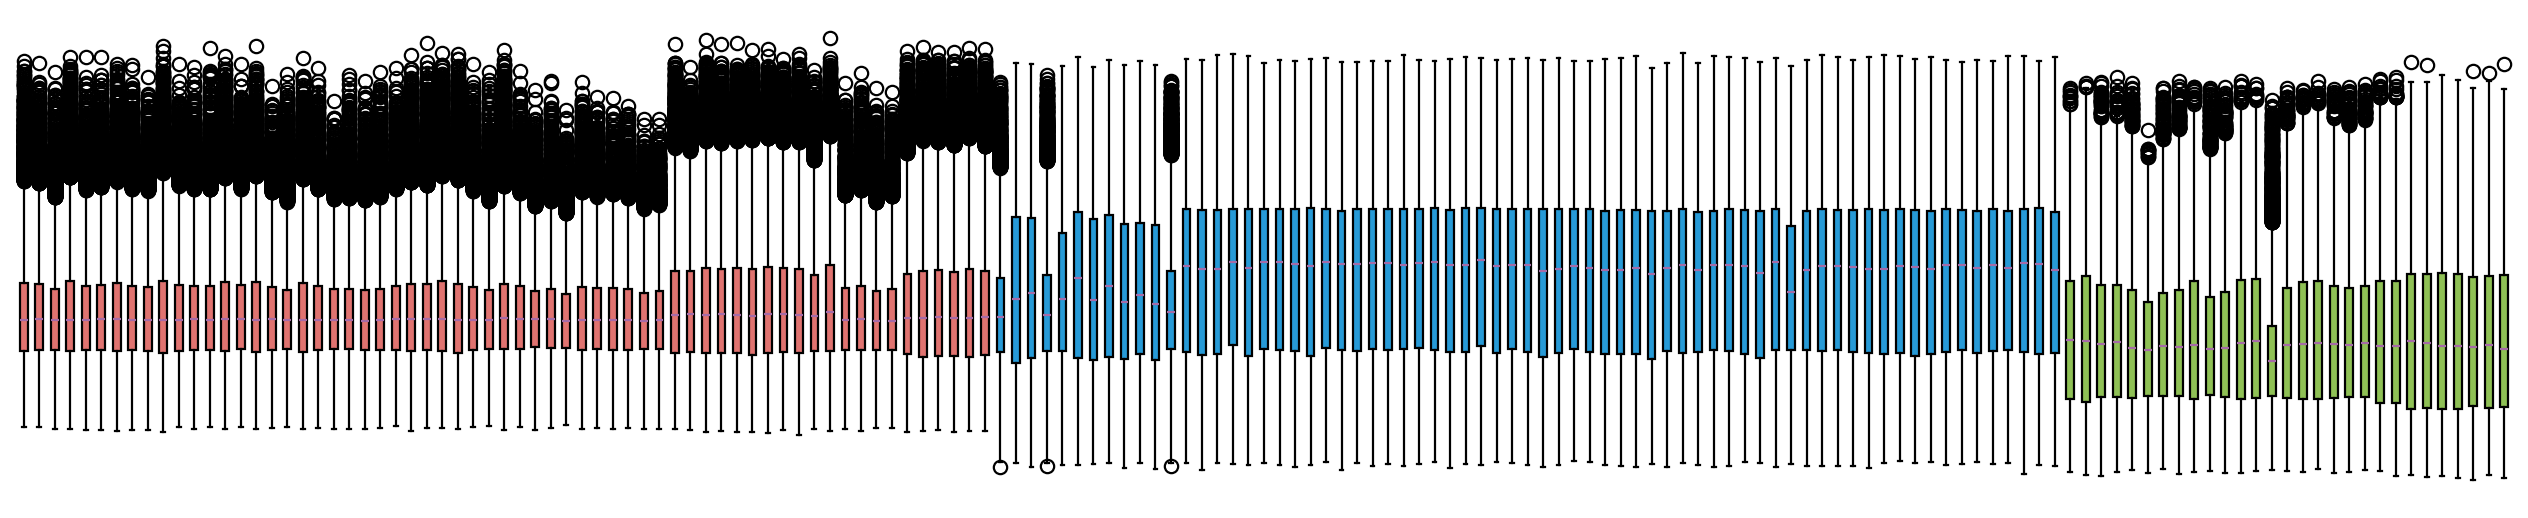

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df().T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(False)
plt.show()

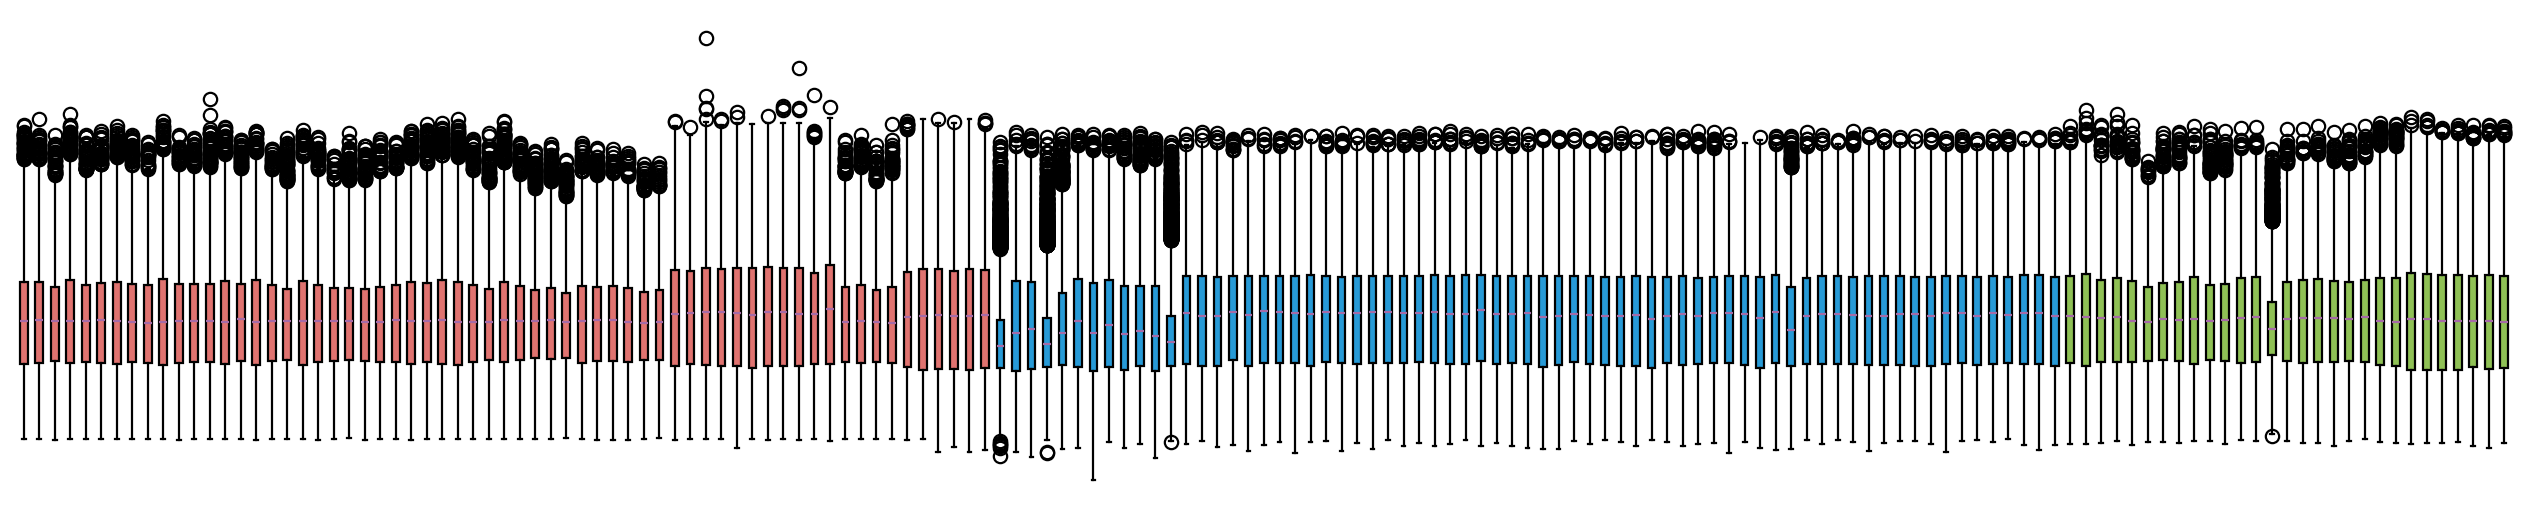

In [21]:
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df(layer='batch_correction').T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(False)
plt.show()

In addition to using boxplots to observe the effect of batch removal, we can also use PCA to observe the effect of batch removal

In [22]:
adata.layers['raw']=adata.X.copy()

We first calculate the PCA on the raw dataset

In [23]:
ov.pp.pca(adata,layer='raw',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:00)


AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'pca', 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'X_pca', 'raw|original|X_pca'
    varm: 'PCs', 'raw|original|pca_loadings'
    layers: 'batch_correction', 'raw'

We then calculate the PCA on the batch_correction dataset

In [24]:
ov.pp.pca(adata,layer='batch_correction',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:00)


AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'pca', 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues', 'status', 'status_args', 'REFERENCE_MANU', 'batch_correction|original|pca_var_ratios', 'batch_correction|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'raw|original|X_pca', 'batch_correction|original|X_pca'
    varm: 'PCs', 'raw|original|pca_loadings', 'batch_correction|original|pca_loadings'
    layers: 'batch_correction', 'raw'

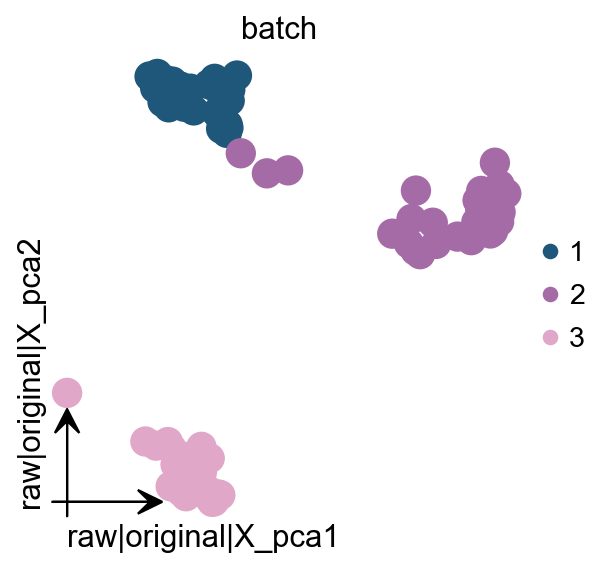

In [25]:
ov.utils.embedding(adata,
                  basis='raw|original|X_pca',
                  color='batch',
                  frameon='small')

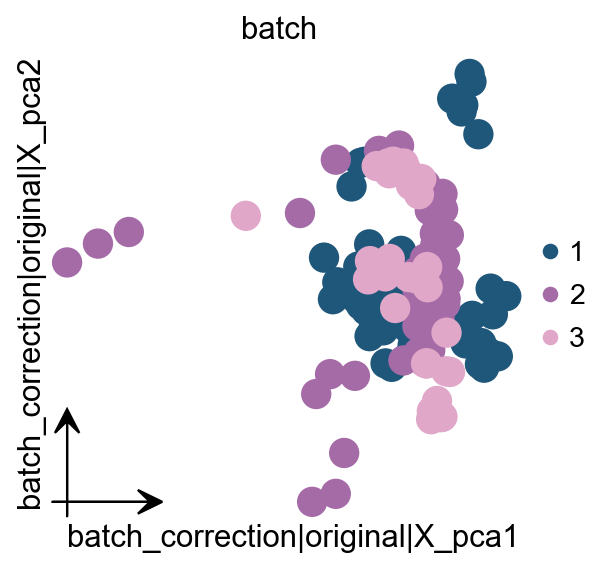

In [26]:
ov.utils.embedding(adata,
                  basis='batch_correction|original|X_pca',
                  color='batch',
                  frameon='small')